
## Importing all necessary packages and libraries


In [ ]:
!pip install pandas folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import folium
from geopy.geocoders import Nominatim
import geopandas as gpd
import folium


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



## Data Loading

In [ ]:
# Load the data
data = pd.read_csv("/content/drive/MyDrive/Tree_Transparency_Data_Analytics/Tree_transparency_data.csv")

In [ ]:
data.head()

Tree Species             State            City    Climate  \
0     Arjun Tree    All over India  All over India   Tropical   
1    Ashoka Tree    Madhya Pradesh          Bhopal   Tropical   
2    Banyan Tree         Karnataka       Bangalore   Tropical   
3  Bengal Quince    All over India  All over India   Tropical   
4      Blue Pine  Himachal Pradesh          Shimla  Temperate   

         Soil Type  Pollution Level  
0  Loamy and sandy  Low to moderate  
1            Loamy              Low  
2            Loamy              Low  
3  Loamy and sandy  Low to moderate  
4  Loamy and sandy  Low to moderate

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tree Species     55 non-null     object
 1   State            55 non-null     object
 2   City             55 non-null     object
 3   Climate          55 non-null     object
 4   Soil Type        55 non-null     object
 5   Pollution Level  55 non-null     object
dtypes: object(6)
memory usage: 2.7+ KB


## Understanding data distribution

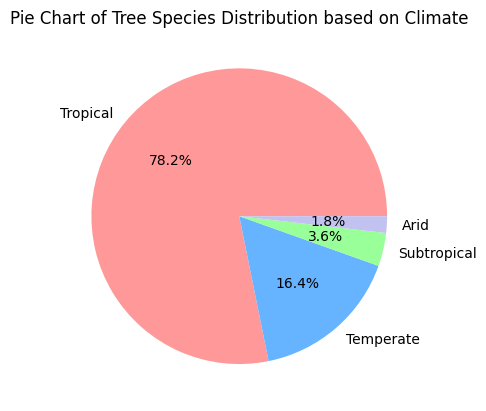

In [ ]:
climate_counts = data['Climate'].value_counts().sort_values(ascending=False)
pie_chart_slice_labels = climate_counts.index.to_numpy()
pie_chart_slice_labels[15:] = ''
pie_chart_slice_values = climate_counts.to_numpy()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0']
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%",colors=colors)
plt.title('Pie Chart of Tree Species Distribution based on Climate')
plt.show()


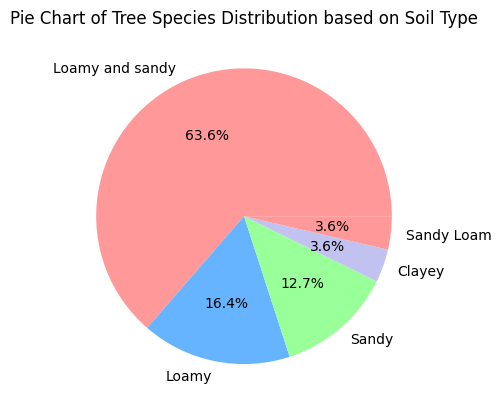

In [ ]:
climate_counts = data['Soil Type'].value_counts().sort_values(ascending=False)

pie_chart_slice_labels = climate_counts.index.to_numpy()

pie_chart_slice_labels[15:] = ''

pie_chart_slice_values = climate_counts.to_numpy()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0']
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%",colors=colors)
plt.title('Pie Chart of Tree Species Distribution based on Soil Type')
plt.show()

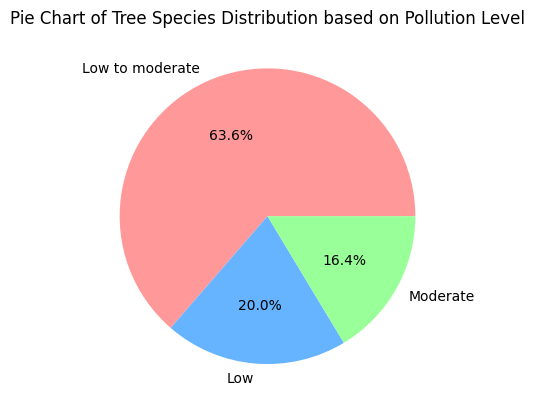

In [ ]:
climate_counts = data['Pollution Level'].value_counts().sort_values(ascending=False)

pie_chart_slice_labels = climate_counts.index.to_numpy()

pie_chart_slice_labels[15:] = ''

pie_chart_slice_values = climate_counts.to_numpy()
colors = ['#ff9999', '#66b3ff', '#99ff99', '#c2c2f0']
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%",colors=colors)
plt.title('Pie Chart of Tree Species Distribution based on Pollution Level')
plt.show()

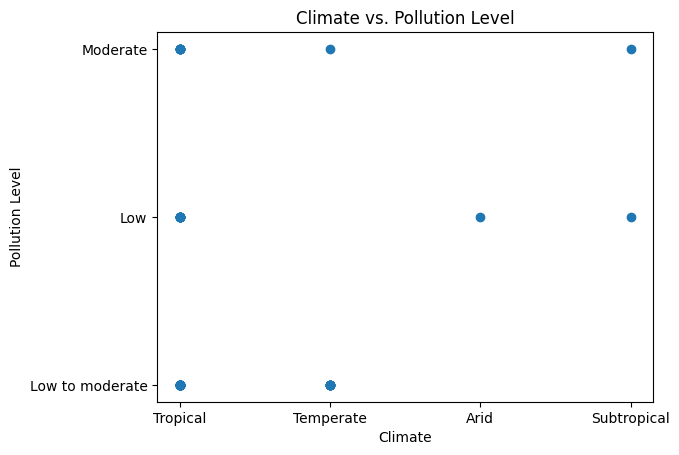

In [ ]:
import matplotlib.pyplot as plt

# Sample data (replace with your dataset)
climate = data['Climate']
pollution_levels = data['Pollution Level']

plt.scatter(climate, pollution_levels)
plt.xlabel('Climate')
plt.ylabel('Pollution Level')
plt.title('Climate vs. Pollution Level')
plt.show()


#Map Visualizations

In [ ]:
# Initialize a map at a certain location(Delhi start coordinates)
m = folium.Map(location=[28.7041, 77.1025], zoom_start=5,
               zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)

# Geocode locations
geolocator = Nominatim(user_agent="tree_distribution_map")

for index, row in data.iterrows():
    location = geolocator.geocode(f"{row['City']}, {row['State']}")
    if location:
        latitude, longitude = location.latitude, location.longitude

        # Create a marker for each tree location
        folium.Marker(
            location=[latitude, longitude],
            popup=f"Tree Species: {row['Tree Species']}, Climate: {row['Climate']}, Soil Type: {row['Soil Type']}, Pollution Level: {row['Pollution Level']}"
        ).add_to(m)

m


In [ ]:
m = folium.Map(location=[28.7041, 77.1025], zoom_start=5,
               zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)

# Create a color mapping for different climate categories
climate_colors = {
    'Tropical': 'green',
    'Temperate': 'blue',
    'Arid': 'red',
    'Subtropical': 'purple'
}

# Geocode locations
geolocator = Nominatim(user_agent="tree_distribution_map")

for index, row in data.iterrows():
    location = geolocator.geocode(f"{row['City']}, {row['State']}")
    if location:
        latitude, longitude = location.latitude, location.longitude

        # Determine the marker color based on the 'Climate' value
        climate = row['Climate']
        marker_color = climate_colors.get(climate, 'gray')

        # Create a marker for each tree location
        folium.Marker(
            location=[latitude, longitude],
            popup=f"Tree Species: {row['Tree Species']}, Climate: {climate}, Soil Type: {row['Soil Type']}, Pollution Level: {row['Pollution Level']}",
            icon=folium.Icon(color=marker_color)
        ).add_to(m)

# Display the map directly in the Jupyter Notebook or similar environment
m

Geospatial data

In [ ]:
gdf = gpd.read_file('/content/drive/MyDrive/Tree_Transparency_Data_Analytics/gadm41_IND_1.json')
columns = gdf.columns

# Print the list of property names
print(columns)

Index(['GID_1', 'GID_0', 'COUNTRY', 'NAME_1', 'VARNAME_1', 'NL_NAME_1',
       'TYPE_1', 'ENGTYPE_1', 'CC_1', 'HASC_1', 'ISO_1', 'geometry'],
      dtype='object')


In [ ]:
state_names = gdf['NAME_1'].tolist()

print(state_names)

['AndamanandNicobar', 'AndhraPradesh', 'ArunachalPradesh', 'ArunachalPradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'DadraandNagarHaveli', 'DamanandDiu', 'Goa', 'Gujarat', 'Haryana', 'HimachalPradesh', 'HimachalPradesh', 'HimachalPradesh', 'JammuandKashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep', 'MadhyaPradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'NCTofDelhi', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'TamilNadu', 'Telangana', 'Tripura', 'UttarPradesh', 'Uttarakhand', 'Uttarakhand', 'Uttarakhand', 'WestBengal']


In [ ]:
gdf['Dummy'] = 5 # Replace with your actual data.

# Create a map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5,zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)

# Create a choropleth layer
folium.Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=['NAME_1', 'Dummy'],
    key_on='feature.properties.NAME_1',
    fill_color='YlOrRd',  # Choose a color palette
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pollution Level'
).add_to(m)

# Display the map
m

Merging dataset and geospatial data for Chloropleth map

In [ ]:
unique_pairs = data[['State', 'Pollution Level']].drop_duplicates()
print(unique_pairs)


                State  Pollution Level
0      All over India  Low to moderate
1      Madhya Pradesh              Low
2           Karnataka              Low
4    Himachal Pradesh  Low to moderate
9      Andhra Pradesh         Moderate
11              Assam              Low
12          Rajasthan              Low
14          Karnataka  Low to moderate
17        West Bengal         Moderate
18             Odisha  Low to moderate
19         Tamil Nadu         Moderate
20        Uttarakhand         Moderate
23             Kerala              Low
43        Maharashtra         Moderate
44      Uttar Pradesh              Low
47         Tamil Nadu              Low
48             Punjab         Moderate
50  Arunachal Pradesh  Low to moderate
51          Telangana         Moderate


In [ ]:
unique_pairs['State'] = unique_pairs['State'].str.strip()
unique_pairs['State'] = unique_pairs['State'].str.replace(' ', '')

In [ ]:
unique_pairs = unique_pairs[unique_pairs['State'] != 'AlloverIndia']
unique_pairs

State  Pollution Level
1      MadhyaPradesh              Low
2          Karnataka              Low
4    HimachalPradesh  Low to moderate
9      AndhraPradesh         Moderate
11             Assam              Low
12         Rajasthan              Low
14         Karnataka  Low to moderate
17        WestBengal         Moderate
18            Odisha  Low to moderate
19         TamilNadu         Moderate
20       Uttarakhand         Moderate
23            Kerala              Low
43       Maharashtra         Moderate
44      UttarPradesh              Low
47         TamilNadu              Low
48            Punjab         Moderate
50  ArunachalPradesh  Low to moderate
51         Telangana         Moderate

In [ ]:
# Create a mapping for pollution levels
pollution_levels = {
    'Low': 4,
    'Moderate': 5,
    'Low to Moderate': 6
}

# Map the 'State' column in unique_pairs to pollution levels
unique_pairs['Levels'] = unique_pairs['Pollution Level'].map(pollution_levels)

# Create a mapping for states in unique_pairs
state_mapping = unique_pairs.set_index('State')['Levels'].to_dict()

# Create a new column in gdf with default value 'Not Available'
gdf['Levels'] = "Not Available"

# Map the states in gdf to their pollution levels
gdf.loc[gdf['NAME_1'].isin(state_mapping.keys()), 'Levels'] = gdf['NAME_1'].map(state_mapping)


In [ ]:
gdf['Levels'].fillna("Not Available", inplace=True)

In [ ]:
states_to_change = [
    'JammuandKashmir',
    'Jharkhand',
    'Manipur',
    'Mizoram',
    'Nagaland',
    'Sikkim'
]

gdf.loc[gdf['NAME_1'].isin(states_to_change) & (gdf['Levels'] == 'Not Available'), 'Levels'] = 3

In [ ]:
additional_states_to_change = [
    'ArunachalPradesh',
    'HimachalPradesh',
    'Karnataka',
    'Kerala',
    'Meghalaya',
    'Puducherry',
    'Punjab',
    'Tamil Nadu',
    'Uttarakhand'
]

gdf.loc[gdf['NAME_1'].isin(additional_states_to_change) & (gdf['Levels'] == 'Not Available'), 'Levels'] = 4

In [ ]:
specified_states_to_change = [
    'Andhra Pradesh',
    'Assam',
    'Bihar',
    'Chandigarh',
    'Chhattisgarh',
    'Dadra And Nagar Haveli',
    'Daman And Diu',
    'Delhi',
    'Goa',
    'Gujarat',
    'Haryana',
    'Madhya Pradesh',
    'Maharashtra',
    'Odisha',
    'Rajasthan',
    'Telangana',
    'Tripura',
    'Uttar Pradesh',
    'West Bengal'
]

gdf.loc[gdf['NAME_1'].isin(specified_states_to_change), 'Levels'] = 5.5

In [ ]:
gdf.loc[gdf['Levels'] == "Not Available", 'Levels'] = 5

In [ ]:
gdf

GID_1 GID_0 COUNTRY               NAME_1  \
0    IND.1_1   IND   India    AndamanandNicobar   
1    IND.2_1   IND   India        AndhraPradesh   
2    IND.3_1   IND   India     ArunachalPradesh   
3    Z07.3_1   Z07   India     ArunachalPradesh   
4    IND.4_1   IND   India                Assam   
5    IND.5_1   IND   India                Bihar   
6    IND.6_1   IND   India           Chandigarh   
7    IND.7_1   IND   India         Chhattisgarh   
8    IND.8_1   IND   India  DadraandNagarHaveli   
9    IND.9_1   IND   India          DamanandDiu   
10  IND.10_1   IND   India                  Goa   
11  IND.11_1   IND   India              Gujarat   
12  IND.12_1   IND   India              Haryana   
13  IND.13_1   IND   India      HimachalPradesh   
14  Z04.13_1   Z04   India      HimachalPradesh   
15  Z09.13_1   Z09   India      HimachalPradesh   
16  Z01.14_1   Z01   India      JammuandKashmir   
17  IND.15_1   IND   India            Jharkhand   
18  IND.16_1   IND   India            Karnataka   
19  IND.17_1   IND   India               Kerala   
20  IND.18_1   IND   India          Lakshadweep   
21  IND.19_1   IND   India        MadhyaPradesh   
22  IND.20_1   IND   India          Maharashtra   
23  IND.21_1   IND   India              Manipur   
24  IND.22_1   IND   India            Meghalaya   
25  IND.23_1   IND   India              Mizoram   
26  IND.24_1   IND   India             Nagaland   
27  IND.25_1   IND   India           NCTofDelhi   
28  IND.26_1   IND   India               Odisha   
29  IND.27_1   IND   India           Puducherry   
30  IND.28_1   IND   India               Punjab   
31  IND.29_1   IND   India            Rajasthan   
32  IND.30_1   IND   India               Sikkim   
33  IND.31_1   IND   India            TamilNadu   
34  IND.32_1   IND   India            Telangana   
35  IND.33_1   IND   India              Tripura   
36  IND.34_1   IND   India         UttarPradesh   
37  IND.35_1   IND   India          Uttarakhand   
38  Z05.35_1   Z05   India          Uttarakhand   
39  Z09.35_1   Z09   India          Uttarakhand   
40  IND.36_1   IND   India           WestBengal   

                           VARNAME_1 NL_NAME_1         TYPE_1       ENGTYPE_1  \
0      Andaman&NicobarIslands|Andama        NA  UnionTerritor  UnionTerritory   
1                                 NA        NA          State           State   
2        AgencedelaFrontièreduNord-E        NA          State           State   
3        AgencedelaFrontièreduNord-E        NA          State           State   
4                                 NA        NA          State           State   
5                                 NA        NA          State           State   
6                                 NA        NA  UnionTerritor  UnionTerritory   
7                                 NA        NA          State           State   
8        DAdraetNagarHaveli|DadraeNa        NA  UnionTerritor  UnionTerritory   
9                                 NA        NA  UnionTerritor  UnionTerritory   
10                               Gôa        NA          State           State   
11       Goudjerate|Gujerat|Gujerate        NA          State           State   
12                                NA        NA          State           State   
13                                NA        NA  UnionTerritor  UnionTerritory   
14                                NA        NA  UnionTerritor  UnionTerritory   
15                                NA        NA  UnionTerritor  UnionTerritory   
16                                NA        NA          State           State   
17                         Vananchal        NA          State           State   
18                     Maisur|Mysore        NA          State           State   
19                                NA        NA          State           State   
20   ÍlesLaquedives|Laccadive|Minico        NA  UnionTerritor  UnionTerritory   
21                                NA        NA          State           State   
2

In [ ]:
# Create a map
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5,zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)

# Create a choropleth layer
folium.Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=['NAME_1', 'Levels'],
    key_on='feature.properties.NAME_1',
    fill_color='YlOrRd',  # Choose a color palette
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pollution Level'
).add_to(m)

# Display the map
m

In [ ]:
m = folium.Map(location=[20.5937, 78.9629], zoom_start=5,zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)

folium.Choropleth(
    geo_data=gdf,
    data=gdf,
    columns=['NAME_1', 'Levels'],
    key_on='feature.properties.NAME_1',
    fill_color='YlOrRd',  # Choose a color palette
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Pollution Level'
).add_to(m)
# Create a color mapping for different climate categories
climate_colors = {
    'Tropical': 'green',
    'Temperate': 'blue',
    'Arid': 'red',
    'Subtropical': 'purple'
}

# Geocode locations
geolocator = Nominatim(user_agent="tree_distribution_map")

for index, row in data.iterrows():
    location = geolocator.geocode(f"{row['City']}, {row['State']}")
    if location:
        latitude, longitude = location.latitude, location.longitude
        # Determine the marker color based on the 'Climate' value
        climate = row['Climate']
        marker_color = climate_colors.get(climate, 'gray')

        # Create a marker for each tree location
        folium.Marker(
            location=[latitude, longitude],
            popup=f"Tree Species: {row['Tree Species']}, Climate: {climate}, Soil Type: {row['Soil Type']}, Pollution Level: {row['Pollution Level']}",
            icon=folium.Icon(color=marker_color)
        ).add_to(m)
# Display the map
m

## Basic Conditional Recommendation

In [ ]:
climate = input("Enter the climate type (Tropical/Subtropical/Temperate/Arid): ")
soil_type = input("Enter the soil type (Loamy/Sandy/Clayey/Sandy Loam): ")
pollution_level = input("Enter the pollution level (Low/Moderate/High): ")

filtered_data = data[
    (data["Climate"] == climate) &
    (data["Soil Type"] == soil_type) &
    (data["Pollution Level"] == pollution_level)
]


if len(filtered_data) == 0:
    print("No suitable tree species found for the specified conditions.")
else:
    recommended_species = filtered_data["Tree Species"].tolist()
    print("Recommended tree species for planting:")
    for species in recommended_species:
        print(species)

Enter the climate type (Tropical/Subtropical/Temperate/Arid): Tropical
Enter the soil type (Loamy/Sandy/Clayey/Sandy Loam): Loamy
Enter the pollution level (Low/Moderate/High): Low
Recommended tree species for planting:
Ashoka Tree
Banyan Tree
Coral Jasmine
Indian Mahogany
Indian Oak
Teak Tree



#TF-IDF

In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/Tree_Transparency_Data_Analytics/Tree_transparency_data.csv")
# Preprocess data to combine relevant columns into a single description
data1['description'] = data1['Tree Species'] + ' ' + data1['State'] + ' ' + data1['City'] + ' ' + data1['Climate'] + ' ' + data1['Soil Type'] + ' ' + data1['Pollution Level']

# Create a TF-IDF vectorizer for the description
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['description'])

# Calculate the cosine similarity between plants based on their features
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on plant name
def get_recommendations(plant_name, cosine_sim=cosine_sim):
    idx = data1[data1['Tree Species'] == plant_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Get the top 10 similar plants (excluding itself)
    plant_indices = [i[0] for i in sim_scores]
    return data1['Tree Species'].iloc[plant_indices]

# Get recommendations for a specific plant
recommendations = get_recommendations('Arjun Tree')
print(recommendations)

54        Umbrella Tree
5      Bottlebrush Tree
35           Kadam Tree
31    Indian Tulip Tree
33                Jamun
36               Karanj
37                Khair
38         Krishnachura
46             Pongamia
21        Indian Laurel
Name: Tree Species, dtype: object


TF-IDF is a frequency-based approach that considers the importance of terms in a document, while Word2Vec is a neural network-based approach that captures semantic relationships between words.

## Word2Vec

In [ ]:
pip install gensim


In [ ]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

data2=pd.read_csv("/content/drive/MyDrive/Tree_Transparency_Data_Analytics/Tree_transparency_data.csv")
# Preprocess data to combine relevant columns into a single description
data2['description'] = data2['Tree Species'] + ' ' + data2['State'] + ' ' + data2['City'] + ' ' + data2['Climate'] + ' ' + data2['Soil Type'] + ' ' + data2['Pollution Level']

# Tokenize the descriptions
tokenized_descriptions = [description.split() for description in data2['description']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_descriptions, vector_size=100, window=5, min_count=1, workers=4)

# Function to get recommendations based on plant name using Word2Vec similarity
def get_word2vec_recommendations(plant_name, word2vec_model=word2vec_model):
    vector = word2vec_model.wv[plant_name]
    sim_scores = word2vec_model.wv.most_similar(positive=[vector], topn=11)[1:]  # Get the top 10 similar plants (excluding itself)
    plant_names = [score[0] for score in sim_scores]
    return data2['Tree Species'][data2['Tree Species'].isin(plant_names)]

# Get recommendations for a specific plant using Word2Vec
word2vec_recommendations = get_word2vec_recommendations('Kadam')
print(word2vec_recommendations)


36      Karanj
46    Pongamia
Name: Tree Species, dtype: object


In [ ]:
pip install sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 949.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.0 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=bad6939a776136104540c17cb2346f7b188ba9911bef1799a1412befe5d70a69
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity


data2=pd.read_csv("/content/drive/MyDrive/Tree_Transparency_Data_Analytics/Tree_transparency_data.csv")
# Preprocess data to combine relevant columns into a single description

data1['description'] = data1['Tree Species'] + ' ' + data1['State'] + ' ' + data1['City'] + ' ' + data1['Climate'] + ' ' + data1['Soil Type'] + ' ' + data1['Pollution Level']

# Load a pre-trained BERT model for sentence embeddings
bert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode descriptions using BERT embeddings
sentence_embeddings = bert_model.encode(data1['description'])

# Function to get recommendations based on plant name using BERT embeddings
def get_bert_recommendations(plant_name, embeddings=sentence_embeddings):
    idx = data1[data1['Tree Species'] == plant_name].index[0]
    query_embedding = embeddings[idx]
    sim_scores = cosine_similarity([query_embedding], embeddings)[0]
    sim_scores = sim_scores.argsort()[::-1][1:11]  # Get the top 10 similar plants (excluding itself)
    return data1['Tree Species'].iloc[sim_scores]

# Get recommendations for a specific plant using BERT embeddings
bert_recommendations = get_bert_recommendations('Arjun Tree')
print(bert_recommendations)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

35          Kadam Tree
54       Umbrella Tree
38        Krishnachura
5     Bottlebrush Tree
37               Khair
45                Pine
6          Cluster Fig
1          Ashoka Tree
22        Indian Lilac
3        Bengal Quince
Name: Tree Species, dtype: object


## Kmeans

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tree Species     55 non-null     object
 1   State            55 non-null     object
 2   City             55 non-null     object
 3   Climate          55 non-null     object
 4   Soil Type        55 non-null     object
 5   Pollution Level  55 non-null     object
 6   description      55 non-null     object
dtypes: object(7)
memory usage: 3.1+ KB


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder  # Add this line

# Load the tree data
data = pd.read_csv("/content/drive/MyDrive/Tree_Transparency_Data_Analytics/Tree_transparency_data.csv")

# Add a state region column
data['State Region'] = data['State'].str.split(',', 1).tolist()
data['State Region'] = data['State Region'].str.get(0)

data['Pollution Level'] = pd.Categorical(data['Pollution Level'])

label_encoder = LabelEncoder()
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()

label_encoder5 = LabelEncoder()
data['Climate'] = label_encoder.fit_transform(data['Climate'])
data['Soil Type'] = label_encoder1.fit_transform(data['Soil Type'])
data['Pollution Level'] = label_encoder2.fit_transform(data['Pollution Level'])

data['State Region'] = label_encoder3.fit_transform(data['State Region'])
data['City'] = label_encoder4.fit_transform(data['City'])

data['Tree Species'] = label_encoder5.fit_transform(data['Tree Species'])
data.head()


<ipython-input-36-fefcf7b38612>:9: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  data['State Region'] = data['State'].str.split(',', 1).tolist()


Tree Species             State  City  Climate  Soil Type  Pollution Level  \
0             0    All over India     0        3          2                1   
1             1    Madhya Pradesh     2        3          1                0   
2             2         Karnataka     1        3          1                0   
3             3    All over India     0        3          2                1   
4             4  Himachal Pradesh    17        2          2                1   

   State Region  
0             0  
1             7  
2             5  
3             0  
4             4

In [ ]:
# Convert the Pollution Level column to a categorical variable

# Select the features to cluster on
features = ['State Region', 'Pollution Level']

# Create a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to the tree data
kmeans.fit(data[features])

# Predict the cluster labels for each tree
cluster_labels = kmeans.predict(data[features])

# Print the cluster labels
print(cluster_labels)


[0 2 2 0 2 0 0 2 2 0 2 2 1 2 2 0 0 1 2 1 1 0 0 2 0 2 2 2 0 2 2 0 2 0 0 0 0
 0 0 0 0 1 1 2 1 0 0 1 1 2 0 1 2 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score


In [ ]:
# Select the features to cluster on
features = ['State Region', 'Pollution Level']

# Create a KMeans model with a specific number of clusters (e.g., 3)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)

# Fit the model to the tree data
kmeans.fit(data[features])

# Predict the cluster labels for each tree
cluster_labels = kmeans.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


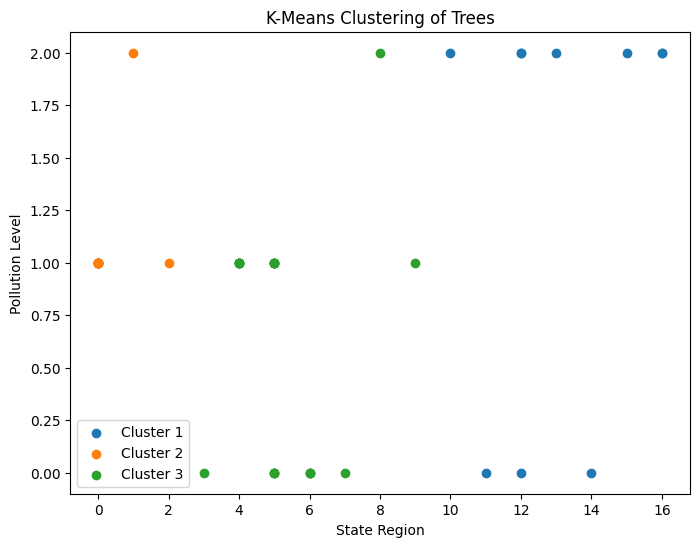

In [ ]:
# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(num_clusters):
    cluster_data = data[cluster_labels == i]
    plt.scatter(cluster_data['State Region'], cluster_data['Pollution Level'], label=f'Cluster {i + 1}')

plt.xlabel('State Region')
plt.ylabel('Pollution Level')
plt.title('K-Means Clustering of Trees')
plt.legend()
plt.show()

In [ ]:
silhouette_avg = silhouette_score(data[features], cluster_labels)
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.76


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2, Silhouette Score: 0.69
K=3, Silhouette Score: 0.76
K=4, Silhouette Score: 0.74
K=5, Silhouette Score: 0.74


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=6, Silhouette Score: 0.70
K=7, Silhouette Score: 0.71
K=8, Silhouette Score: 0.72
K=9, Silhouette Score: 0.73


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=10, Silhouette Score: 0.75


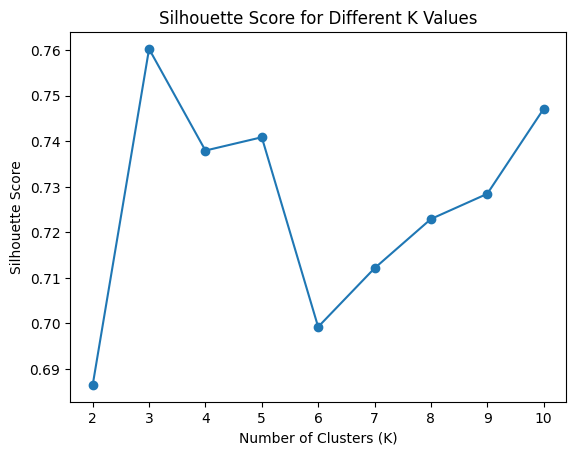

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Try different values of K
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(data[features])
    silhouette_avg = silhouette_score(data[features], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'K={k}, Silhouette Score: {silhouette_avg:.2f}')

# Plot the silhouette scores for different K values
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K Values')
plt.show()
